In [108]:
# 패키지 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
from tqdm import tqdm
from plotly.subplots import make_subplots
plt.rcParams['axes.unicode_minus'] = False
f_path = "/Library/Fonts/Arial Unicode.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

### 목차
- 데이터 탐색
        - 결측치 제거 및 유니크 값 확인
        - 시간에 따른 탐색
        - Amount의 심화 탐색
        - installments(할부) 심화 탐색

In [56]:
# 데이터 탐색하기

In [57]:
# 데이터 불러오기
train = pd.read_csv("train.csv")

In [58]:
train.tail()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0
3362795,1799,2018-07-30,10:58:53,42d354807a,325,NaN,0,0


In [59]:
# 변수 8개 관측치는 약 330만개로 관측치에 비해 변수가 적은편이다.
train.shape

(3362796, 8)

In [60]:
# 데이터 정보
# store_id :각 파일에서의 상점 고유 번호.
# date : 거래 일자
# time :거래 시간
# card_id :카드 번호의 hash 값
# amount :매출액
# installments : 할부개월수. 일시불은 빈 문자열
# days_of_week : 요일, 월요일이 0, 일요일은 6
# holiday : 0이면 공휴일 아님, 1이면 공휴일
# 여기서 매출액은 원화가 아닙니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [61]:
# 데이터 유니크 값 개수 확인
# 2년동안 1775개의 상점에서 922522개의 신용카드가 조사된 것을 알 수 있다.
train_unique = []
for i in train.columns.values:
    train_unique.append(len(train[i].unique()))
unique_train = pd.DataFrame()
unique_train['Columns'] = list(train.columns)
unique_train['Unique_value'] = train_unique
unique_train

,Columns,Unique_value
0,store_id,1775
1,date,730
2,time,85924
3,card_id,922522
4,amount,6031
5,installments,17
6,days_of_week,7
7,holyday,2


In [62]:
# 유니크 값 개수 그래프로 확인
data = [go.Bar(x = unique_train['Columns'], y = unique_train['Unique_value'], name = "유니크 값", opacity = 0.8)]
layout= go.Layout(title= "컬럼별 유니크 값 개수", xaxis= dict(title=' ', ticklen=5, zeroline=False, gridwidth=2), yaxis= dict(title='개수', ticklen=5, gridwidth=2), showlegend=True)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='컬럼별 유니크 값 개수')

In [63]:
# installments 컬럼에 결측치가 3345936개 있는 것 확인

train.count()

store_id        3362796
date            3362796
time            3362796
card_id         3362796
amount          3362796
installments      16860
days_of_week    3362796
holyday         3362796
dtype: int64

In [64]:
# 결측치 그래프로 확인

data = [go.Bar(x=train.columns, y=train.isnull().sum(), name="결측치", opacity = 0.8)]
layout= go.Layout(title= "결측치 개수", xaxis= dict(title=' ', ticklen=5, zeroline=False, gridwidth=2), yaxis= dict(title='결측치 개수', ticklen=5, gridwidth=2), showlegend=True)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='결측치 개수')

In [65]:
# 결측치가 있다는 것을 확인했으니 결측치를 채우자!
# installments에서 결측치는 일시불을 의미하니 1로 채우겠습니다.

In [66]:
train["installments"] = train["installments"].fillna(1)

In [67]:
# 결측치를 채웠으니 다시 확인해보자!
train.count()

store_id        3362796
date            3362796
time            3362796
card_id         3362796
amount          3362796
installments    3362796
days_of_week    3362796
holyday         3362796
dtype: int64

In [68]:
# installments가 채워진 것을 확인할 수 있다.
train.tail()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1.0,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1.0,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1.0,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,1.0,2,0
3362795,1799,2018-07-30,10:58:53,42d354807a,325,1.0,0,0


In [69]:
train.describe()

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,3.362796e+06,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,1.012331e+00,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.421382e-01,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,1.000000e+00,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,1.000000e+00,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,3.600000e+01,6.000000e+00,1.000000e+00


In [70]:
# amount의 분포를 그래프로 보겠습니다. 이렇게 봐서는 정확하게 파악하기 어려움

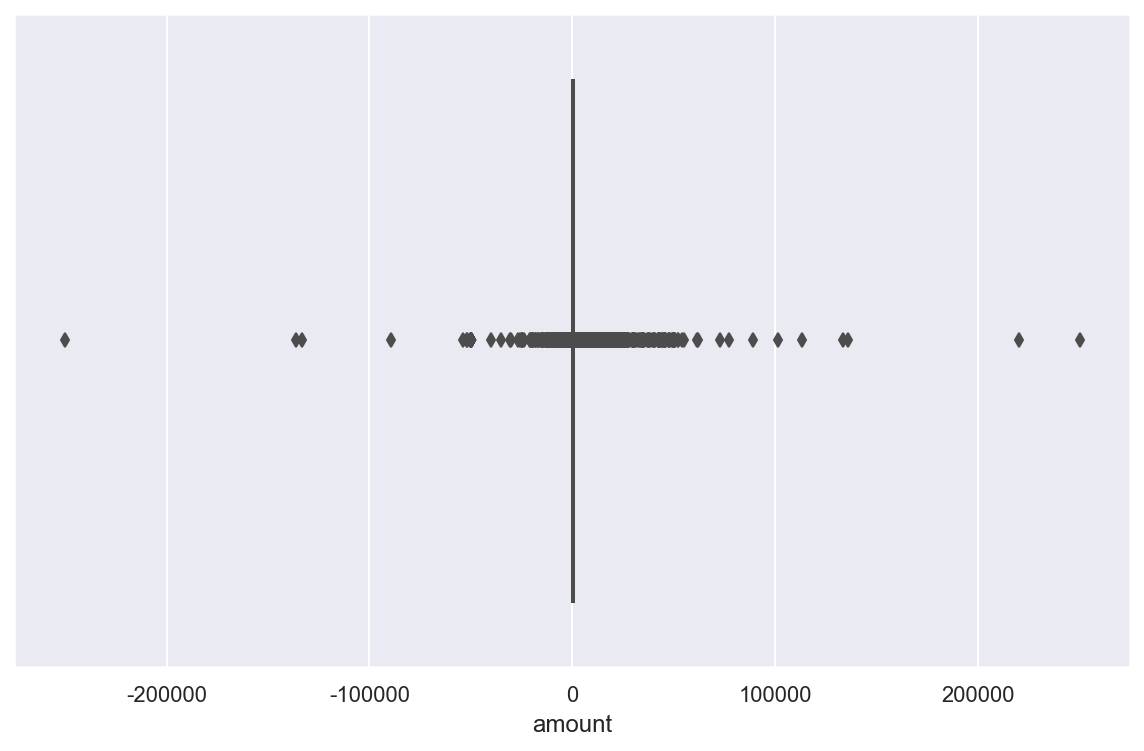

In [71]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.boxplot(x=train["amount"])
plt.show()

In [72]:
# amount는 환불 때문에 -값이 생긴 것을 볼 수 있다.

In [73]:
# 환불 건을 제거하기 위해 날짜와 시간 컬럼을 합친 컬럼을 만들겠습니다.
train['datetime'] = pd.to_datetime(train.date + " " + train.time, format='%Y-%m-%d %H:%M:%S')

In [74]:
##환볼 노이즈를 제거 하는 함수
def refund_remove(df):
    refund=df[df['amount']<0]
    non_refund=df[df['amount']>0]
    remove_data=pd.DataFrame()
    
    for i in tqdm(df.store_id.unique()):
        divided_data=non_refund[non_refund['store_id']==i] ##non_refund 스토어 데이터를 스토어별로 나눔
        divided_data2=refund[refund['store_id']==i] ##refund 스토어 데이터를 나눔 스토어별로 나눔
        
        for neg in divided_data2.to_records()[:]: ##환불데이터를 차례대로 검사
            refund_store=neg['store_id']
            refund_id=neg['card_id'] ## 환불 카드 아이디
            refund_datetime=neg['datetime'] ## 환불 시간
            refund_amount=abs(neg['amount']) ## 환불액 절대값을 씌움
                
            ##환불시간 이전의 데이터중 카드이이디와 환불액이 같은 후보 리스트를 뽑는다.
            refund_pay_list=divided_data[divided_data['datetime']<=refund_datetime]
            refund_pay_list=refund_pay_list[refund_pay_list['card_id']==refund_id]
            refund_pay_list=refund_pay_list[refund_pay_list['amount']==refund_amount]
                
                
            #후보리스트가 있으면,카드아이디, 환불액이 같으면서 가장 최근시간을 제거
            if(len(refund_pay_list)!=0):
                refund_datetime=max(refund_pay_list['datetime']) ##가장 최근 시간을 구한다
                remove=divided_data[divided_data['datetime']==refund_datetime] ##가장 최근시간
                remove=remove[remove['card_id']==refund_id] ##환불 카드 아이디
                remove=remove[remove['amount']==refund_amount] ##환불액
                divided_data=divided_data.drop(index=remove.index) #인덱스를 통해 제거
                    
        ##제거한데이터를 데이터프레임에 추가한다.
        remove_data=pd.concat([remove_data,divided_data],axis=0)
    
    return remove_data

In [ ]:
# 환불한 결제건 지우기
train=refund_remove(train)

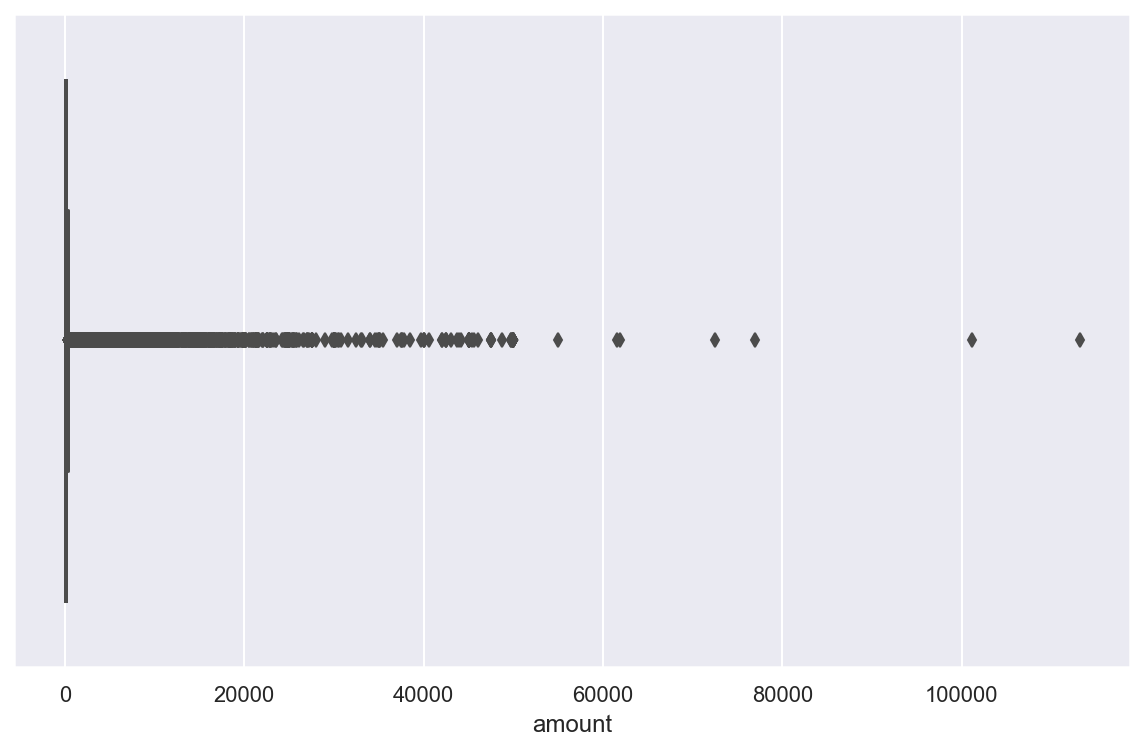

In [76]:
# 환불값을 제거한 후의 amount 
# -값은 정리가 되었으나 너무 격차가 큰 이상치가 1개 있어서 제거하기로 함
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.boxplot(x=train["amount"])
plt.show()

In [ ]:
train[train["amount"]>200000]

In [ ]:
# 200000이 넘는 이상치 한 개 제거함
train = train.drop([700736], axis=0)

In [ ]:
# 이상치 제거 후 amount 분포
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.boxplot(x=train["amount"])
plt.show()

In [79]:
# 월별 매출을 알아보기 위해 컬럼 생성
train["year-month"] = train["date"].apply(lambda x: x[:7])

In [80]:
# 나머지 컬럼생성을 쉽게 하기위해 "date" 타입을 변경
train["date"] = train["date"].astype("datetime64[ns]")

In [130]:
# date 타입이 datetime64[ns]로 변경됨
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294119 entries, 0 to 3294118
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   store_id      int64         
 1   date          datetime64[ns]
 2   time          object        
 3   card_id       object        
 4   amount        int64         
 5   installments  float64       
 6   days_of_week  int64         
 7   holyday       int64         
 8   year-month    object        
 9   datetime      object        
 10  year          int64         
 11  month         int64         
 12  day           int64         
 13  hour          int64         
 14  weekend       int64         
dtypes: datetime64[ns](1), float64(1), int64(9), object(4)
memory usage: 377.0+ MB


In [82]:
# 현재 데이터로는 월별로 groupby를 할 수 없어 년, 월, 일, 시간, 평일과 주말 컬럼을 새로 만들어 주겠습니다.

In [83]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day


train['hour'] = train['time'].apply(lambda x: x[0:2])
train['hour'] = train['hour'].astype('int')

train['weekend'] = train['days_of_week'].apply(lambda x: 1 if x > 4 else 0)

In [84]:
# 컬럼 생성 확인
train.tail()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year-month,datetime,year,month,day,hour,weekend
3294114,1799,2018-07-19,17:58:31,e254bf70d9,600,1.0,3,0,2018-07,2018-07-19 17:58:31,2018,7,19,17,0
3294115,1799,2018-07-19,18:54:34,8f41c89891,275,1.0,3,0,2018-07,2018-07-19 18:54:34,2018,7,19,18,0
3294116,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1.0,6,0,2018-07,2018-07-22 14:46:57,2018,7,22,14,1
3294117,1799,2018-07-25,18:09:13,57932602d6,300,1.0,2,0,2018-07,2018-07-25 18:09:13,2018,7,25,18,0
3294118,1799,2018-07-30,10:58:53,42d354807a,325,1.0,0,0,2018-07,2018-07-30 10:58:53,2018,7,30,10,0


In [86]:
# 전처리도 했고 컬럼을 생성했으니 이제부터 데이터 분석 시작.

In [93]:
# 우선 2년동안 상점들의 월별 매출을 확인해보겠습니다.
# 월별 총 매출을 확인해보자
monthly_sales = train.groupby("year-month").sum()["amount"].reset_index(name="monthly_total_amount")
monthly_sales.head(2)

,year-month,monthly_total_amount
0,2016-08,12745783
1,2016-09,12447832


In [114]:
monthly_mean = train.groupby("year-month")["amount"].mean().reset_index(name="monthly_mean")
monthly_mean.head(2)

,year-month,monthly_mean
0,2016-08,145.579576
1,2016-09,147.531609


In [113]:
# 결제 횟수가 많아지면서 총 매출이 상승함
monthly_count = train.groupby("year-month")["amount"].size().reset_index(name="monthly_count") # 상관계수 계산하기
monthly_count.head(2)

,year-month,monthly_count
0,2016-08,87552
1,2016-09,84374


In [122]:
# 결제횟수와 매출과의 관계를 보았더니 상관계수가 매우 높게 나왔다.
np.corrcoef(monthly_sales["monthly_total_amount"], monthly_count["monthly_count"])[0, 1]

0.9826144038929044

In [123]:
# 12월에는 총 매출이 많이 증가하는 것을 볼 수 있다. 연말이라 사람들의 소비가 늘어난 것으로 보인다.
fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02,
    row_heights = [0.4, 0.6],
)
 
fig.add_trace(go.Line(x=monthly_count["year-month"], y=monthly_count["monthly_count"], name="결제 횟수"), row=1, col=1)
fig.add_trace(go.Bar(x=monthly_sales["year-month"], y=monthly_sales["monthly_total_amount"], name="월 매출", marker_color="limegreen", opacity = 0.9), row=2, col=1)
 
fig.update_layout(height=330*2, width=300*3, title_text="월 매출과 결제횟수")
fig.update_yaxes(title_text="결제횟수", row=1, col=1)
fig.update_yaxes(title_text="매출액", row=2, col=1)

fig.show()

In [124]:
# 해석은 각자 알아서

In [125]:
# 계절별 매출은 어떨까? 확인해보자
seasonal_sales = train.groupby("month").sum()["amount"].reset_index(name="seasonal_sales")
seasonal_sales

,month,seasonal_sales
0,1,39476728
1,2,38563862
2,3,45961434
3,4,45986084
4,5,46918909
5,6,45695752
6,7,46659547
7,8,33849353
8,9,34167531
9,10,34644489


In [129]:
# 2분기에 매출이 많이 상승하고 3분기에는 매출이 떨어지는 모습을 보인다. 12월은 연말이라 사람들의 소비가 늘어난 것으로 보임.
data = [go.Bar(x=seasonal_sales["month"], y=seasonal_sales["seasonal_sales"], name="월별 매출", marker_color="blue", opacity = 0.6)]
layout= go.Layout(title= "계절별 매출", xaxis= dict(title=' ', ticklen=5, zeroline=False, gridwidth=2), yaxis= dict(title='매출액', ticklen=5, gridwidth=2), showlegend=True)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='계절별 매출')

In [131]:
# 요일별로 묶기
train_mon = train[train['days_of_week']==0]
train_tue = train[train['days_of_week']==1]
train_wed = train[train['days_of_week']==2]
train_thu = train[train['days_of_week']==3]
train_fri = train[train['days_of_week']==4]
train_sat = train[train['days_of_week']==5]
train_sun = train[train['days_of_week']==6]

In [132]:
# 요일별 매출
monday_amount = train_mon["amount"].sum()
tuesday_amount = train_tue["amount"].sum()
wednesday_amount = train_wed["amount"].sum()
thursday_amount = train_thu["amount"].sum()
firday_amount = train_fri["amount"].sum()
saturday_amount = train_sat["amount"].sum()
sunday_amount = train_sun["amount"].sum()

In [133]:
# 요일별 매출 데이터프레임
week_amount_data = {"요일":["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"],\
        "총매출":[monday_amount, tuesday_amount, wednesday_amount, thursday_amount, firday_amount, saturday_amount, sunday_amount]}
weekly_amount_df = pd.DataFrame(week_amount_data)
weekly_amount_df

,요일,총매출
0,월요일,63775713
1,화요일,69344368
2,수요일,70364239
3,목요일,70740856
4,금요일,77353173
5,토요일,78436708
6,일요일,60627789


In [152]:
# 요일별 총 매출 그래프
data = [go.Scatter(x=weekly_amount_df["요일"], y=weekly_amount_df["총매출"], name="요일별 매출", marker_color="blue")]
layout= go.Layout(title= "요일별 매출", xaxis= dict(title=' ', ticklen=5, zeroline=True, gridwidth=2), yaxis= dict(title='매출액', ticklen=5, gridwidth=2), showlegend=True)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='요일별 매출')

In [140]:
# 요일별 시간대 총 매출
monday_hourly_amount = train_mon.groupby("hour")["amount"].sum().reset_index()
tuesday_hourly_amount = train_tue.groupby("hour")["amount"].sum().reset_index()
wednsday_hourly_amount = train_wed.groupby("hour")["amount"].sum().reset_index()
thursday_hourly_amount = train_thu.groupby("hour")["amount"].sum().reset_index()
friday_hourly_amount = train_fri.groupby("hour")["amount"].sum().reset_index()
saturday_hourly_amount = train_sat.groupby("hour")["amount"].sum().reset_index()
sunday_hourly_amount = train_sun.groupby("hour")["amount"].sum().reset_index()
sunday_hourly_amount.head()

,hour,amount
0,0,2202015
1,1,1734490
2,2,1230491
3,3,746695
4,4,419192


In [158]:
# 요일별 시간대 한 건당 매출을 확인해보겠습니다.
weekly_mean_slaes1 = train_mon.groupby('hour')['amount'].mean().reset_index(name="weekly_mean_slaes1")
weekly_mean_slaes2 = train_tue.groupby('hour')['amount'].mean().reset_index(name="weekly_mean_slaes2")
weekly_mean_slaes3 = train_wed.groupby('hour')['amount'].mean().reset_index(name="weekly_mean_slaes3")
weekly_mean_slaes4 = train_thu.groupby('hour')['amount'].mean().reset_index(name="weekly_mean_slaes4")
weekly_mean_slaes5 = train_fri.groupby('hour')['amount'].mean().reset_index(name="weekly_mean_slaes5")
weekly_mean_slaes6 = train_sat.groupby('hour')['amount'].mean().reset_index(name="weekly_mean_slaes6")
weekly_mean_slaes7 = train_sun.groupby('hour')['amount'].mean().reset_index(name="weekly_mean_slaes7")

weekly_mean_slaes1.tail()

,hour,weekly_mean_slaes1
19,19,149.374055
20,20,177.613360
21,21,173.639091
22,22,174.035624
23,23,195.203839


In [175]:
fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02,
    row_heights = [0.5, 0.5],
)

fig.add_trace(go.Scatter(x=monday_hourly_amount["hour"][::-1], y=monday_hourly_amount["amount"][::-1], name="월요일", marker_color="black"), row=1, col=1)
fig.add_trace(go.Scatter(x=tuesday_hourly_amount["hour"][::-1], y=tuesday_hourly_amount["amount"][::-1], name="화요일", marker_color="yellow"), row=1, col=1)
fig.add_trace(go.Scatter(x=wednsday_hourly_amount["hour"][::-1], y=wednsday_hourly_amount["amount"][::-1], name="수요일", marker_color="green"), row=1, col=1)
fig.add_trace(go.Scatter(x=thursday_hourly_amount["hour"][::-1], y=thursday_hourly_amount["amount"][::-1], name="목요일", marker_color="blue"), row=1, col=1)
fig.add_trace(go.Scatter(x=friday_hourly_amount["hour"][::-1], y=friday_hourly_amount["amount"][::-1], name="금요일", marker_color="purple"), row=1, col=1)
fig.add_trace(go.Scatter(x=saturday_hourly_amount["hour"][::-1], y=saturday_hourly_amount["amount"][::-1], name="토요일", marker_color="orange"), row=1, col=1)
fig.add_trace(go.Scatter(x=sunday_hourly_amount["hour"][::-1], y=sunday_hourly_amount["amount"][::-1], name="일요일", marker_color="red"), row=1, col=1)

fig.add_trace(go.Scatter(x=weekly_mean_slaes1["hour"][::-1], y=weekly_mean_slaes1["weekly_mean_slaes1"][::-1], showlegend=False, marker_color="black"),row=2, col=1)
fig.add_trace(go.Scatter(x=weekly_mean_slaes2["hour"][::-1], y=weekly_mean_slaes2["weekly_mean_slaes2"][::-1], showlegend=False, marker_color="yellow"),row=2, col=1)
fig.add_trace(go.Scatter(x=weekly_mean_slaes3["hour"][::-1], y=weekly_mean_slaes3["weekly_mean_slaes3"][::-1], showlegend=False, marker_color="green"),row=2, col=1)
fig.add_trace(go.Scatter(x=weekly_mean_slaes4["hour"][::-1], y=weekly_mean_slaes4["weekly_mean_slaes4"][::-1], showlegend=False, marker_color="blue"),row=2, col=1)
fig.add_trace(go.Scatter(x=weekly_mean_slaes5["hour"][::-1], y=weekly_mean_slaes5["weekly_mean_slaes5"][::-1], showlegend=False, marker_color="purple"),row=2, col=1)
fig.add_trace(go.Scatter(x=weekly_mean_slaes6["hour"][::-1], y=weekly_mean_slaes6["weekly_mean_slaes6"][::-1], showlegend=False, marker_color="orange"),row=2, col=1)
fig.add_trace(go.Scatter(x=weekly_mean_slaes7["hour"][::-1], y=weekly_mean_slaes7["weekly_mean_slaes7"][::-1], showlegend=False, marker_color="red"),row=2, col=1)

fig.update_layout(height=330*2, width=300*3, title_text="시간대별 매출액과 한 건당 결제금액", showlegend=True)
fig.update_yaxes(title_text="총 매출", row=1, col=1)
fig.update_yaxes(title_text="한 건당 결제금액", row=2, col=1)

fig.show()

In [180]:
# 12시와 18시에 카드 하나당 결제 금액이 낮아지는 것으로 보아 식사 후 각각 계산을 하기 때문인 듯하다.
# 10시와 15시에는 카드 하나당 결제 금액이 높아진다. 한 번에 큰 금액이 결제되는 것

In [181]:
# 일별 구매횟수를 확인해보겠습니다.
daily_count = train.groupby("date")["store_id"].size().reset_index(name="daily_count")
daily_count.tail(2)

,date,daily_count
728,2018-07-30,5691
729,2018-07-31,5941


In [183]:
# 일별 매출합을 보겠습니다.
daily_amount = train.groupby("date")["amount"].sum().reset_index(name="daily_amount")
daily_amount.tail(2)

,date,daily_amount
728,2018-07-30,775870
729,2018-07-31,849250


In [185]:
fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02,
    row_heights = [0.5, 0.5],
)

fig.add_trace(go.Scatter(x=daily_count["date"][::-1], y=daily_count["daily_count"][::-1], name="구매횟수", marker_color="red"), row=1, col=1)

fig.add_trace(go.Scatter(x=daily_amount["date"][::-1], y=daily_amount["daily_amount"][::-1], name="매출액", marker_color="blue"),row=2, col=1)

fig.update_layout(height=330*2, width=300*3, title_text="일일 구매횟수와 매출액", showlegend=True)
fig.update_yaxes(title_text="구매 횟수", row=1, col=1)
fig.update_yaxes(title_text="매출액", row=2, col=1)

fig.show()

In [64]:
# 구매횟수가 떨어지는 날과 연휴를 비교해보자
find_day = ['2016-09-15', '2017-01-28', '2017-10-04', '2018-02-16', '2018-05-06']
train1 = train[(train['date'] == '2016-09-15') | (train['date'] == '2017-01-28') | (train['date'] == '2017-10-04') | (train['date'] == '2018-02-16') | (train['date'] == '2018-05-06')]
train1.groupby('date').agg({'holyday':'mean'})

,holyday
date,
2016-09-15,1
2017-01-28,1
2017-10-04,1
2018-02-16,1
2018-05-06,0


In [66]:
# 구매횟수가 떨어지는 날을 확인해보니 휴일이였다.
# 2016-09-15, 2017-10-04 : 추석, 2017-01-28, 2018-02-16 : 설 
# 추석이나 설 연휴중 당일에는 휴무인 상점이 많아 거래가 준 것으로 보인다.
# 2018-05-06일은 휴일에 포함이 안되어 있는데 2018-05-05일의 대체휴무가 2018-05-07이어서 휴무라고 볼 수 있다.

In [76]:
# 할부분석, 클러스터링하기
# 어느시간과 어느요일에 할부를 많이 하는지 거래취소를 많이 하는지

In [178]:
# 할부 
installments_df = train[(train["installments"] > 1)]
installments_df.tail()  

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year-month,datetime,year,month,day,hour,weekend
3293756,1799,2017-05-14,21:14:12,54b471994c,1500,3.0,6,0,2017-05,2017-05-14 21:14:12,2017,5,14,21,1
3293813,1799,2017-07-19,14:30:10,e47d9a18e4,3850,3.0,2,0,2017-07,2017-07-19 14:30:10,2017,7,19,14,0
3293841,1799,2017-08-18,19:08:43,f293d9dc0c,300,2.0,4,0,2017-08,2017-08-18 19:08:43,2017,8,18,19,0
3294026,1799,2018-02-19,18:34:25,be98bd957b,1175,3.0,0,0,2018-02,2018-02-19 18:34:25,2018,2,19,18,0
3294065,1799,2018-05-01,18:40:11,f293d9dc0c,300,2.0,1,1,2018-05,2018-05-01 18:40:11,2018,5,1,18,0


In [191]:
# 할부별 빈도수
# 일시불이 제일 많았지만 
fig = px.histogram(installments_df, x="installments")
fig.update_layout(title_text="개월수별 할부 빈도수", showlegend=True)
fig.update_xaxes(title_text="할부 개월수")
fig.update_yaxes(title_text="빈도수")
fig.show()

In [192]:
# 어떤 요일에 할부가 가장 많을까?
installments_count_by_day = installments_df.groupby("days_of_week").size().reset_index(name="빈도수")
installments_count_by_day["days_of_week"] = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]

In [196]:
data = [go.Scatter(x=installments_count_by_day["days_of_week"], y=installments_count_by_day["빈도수"], name="요일별 할부결제 빈도수", marker_color="blue", opacity = 0.6)]
layout= go.Layout(title= "요일별 할부결제 빈도수", xaxis= dict(title=' ', ticklen=5, zeroline=True, gridwidth=2), yaxis= dict(title='빈도수', ticklen=5, gridwidth=2), showlegend=True)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='요일별 할부결제 빈도수')

In [209]:
installments1 = train[train['installments']==1]
installments2 = train[train['installments']!=1]

hourly_installments_count1 = installments1.groupby('hour')['amount'].size().reset_index(name="installments_amount_count")
hourly_installments_count2 = installments2.groupby('hour')['amount'].size().reset_index(name="installments_amount_count")
hourly_installments_count2

,hour,installments_amount_count
0,0,108
1,1,119
2,2,94
3,3,65
4,4,31
5,5,14
6,6,54
7,7,60
8,8,76
9,9,282


In [213]:
data = [go.Scatter(x=hourly_installments_count1["hour"], y=hourly_installments_count1["installments_amount_count"], name="일시불", marker_color="blue"),
       go.Scatter(x=hourly_installments_count2["hour"], y=hourly_installments_count2["installments_amount_count"], name="할부", marker_color="red")]
layout= go.Layout(title= "시간대 일시불-할부 거래 횟수", xaxis= dict(title=' ', ticklen=5, zeroline=True, gridwidth=2), yaxis= dict(title='구매 횟수', ticklen=5, gridwidth=2), showlegend=True)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='시간대 일시불-할부 거래 횟수')

In [204]:
hourly_installments_mean1 = installments1.groupby('hour')['amount'].mean().reset_index(name="installments_amount_mean")
hourly_installments_mean2 = installments2.groupby('hour')['amount'].mean().reset_index(name="installments_amount_mean")
hourly_installments_mean2

,hour,installments_amount_mean
0,0,1985.027778
1,1,1669.949580
2,2,1283.585106
3,3,1503.307692
4,4,1098.483871
5,5,836.000000
6,6,718.240741
7,7,952.566667
8,8,1267.342105
9,9,2688.131206


In [205]:
data = [go.Scatter(x=hourly_installments_mean1["hour"], y=hourly_installments_mean1["installments_amount_mean"], name="일시불", marker_color="blue"),
       go.Scatter(x=hourly_installments_mean2["hour"], y=hourly_installments_mean2["installments_amount_mean"], name="할부", marker_color="red")]
layout= go.Layout(title= "시간대 일시불-할부 거래 금액", xaxis= dict(title=' ', ticklen=5, zeroline=True, gridwidth=2), yaxis= dict(title='평균 금액', ticklen=5, gridwidth=2), showlegend=True)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='시간대 일시불-할부 거래 금액')

In [81]:
installments1 = installments_df[installments_df["weekend"]==0]
installments2 = installments_df[installments_df["weekend"]==1]

In [82]:
installments_count_by_hour1 = installments1.groupby("hour").size().reset_index(name="평일 시간별 할부결제 빈도수")
installments_count_by_hour2 = installments2.groupby("hour").size().reset_index(name="주말 시간별 할부결제 빈도수")
installments_count_by_hour1.head(2)

,hour,평일 시간별 할부결제 빈도수
0,0,74
1,1,88


In [83]:
installments_count_by_hour1["평일 평균 할부결제 빈도수"] = (installments_count_by_hour1["평일 시간별 할부결제 빈도수"].values)/5 
installments_count_by_hour2["주말 평균 할부결제 빈도수"] = (installments_count_by_hour2["주말 시간별 할부결제 빈도수"].values)/2 
installments_count_by_hour1.head(2)

,hour,평일 시간별 할부결제 빈도수,평일 평균 할부결제 빈도수
0,0,74,14.8
1,1,88,17.6


In [84]:
data = [go.Scatter(x=installments_count_by_hour1["hour"], y=installments_count_by_hour1["평일 평균 할부결제 빈도수"], name="평일", marker_color="blue"),
       go.Scatter(x=installments_count_by_hour2["hour"], y=installments_count_by_hour2["주말 평균 할부결제 빈도수"], name="주말", marker_color="red")]
layout= go.Layout(title= "평일 VS 주말 시간별 할부결제 빈도수", xaxis= dict(title='시간', ticklen=5, zeroline=False, gridwidth=2), yaxis= dict(title='빈도수', ticklen=5, gridwidth=2), showlegend=True)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='시간별 할부결제 빈도수')

In [85]:
# 거래취소 건수 33832개
train[train["amount"] < 0].sort_values(by="amount")

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year-month,year,month,day,hour,weekend
929617,370,2018-04-10,14:59:47,d8b799ac0c,-50000,3.0,1,0,2018-04,2018,4,10,14,0
929647,370,2018-07-13,20:10:35,d8b799ac0c,-50000,3.0,4,0,2018-07,2018,7,13,20,0
929649,370,2018-07-13,20:10:36,d8b799ac0c,-50000,3.0,4,0,2018-07,2018,7,13,20,0
929650,370,2018-07-17,19:44:42,d8b799ac0c,-50000,3.0,1,0,2018-07,2018,7,17,19,0
929651,370,2018-07-17,19:44:42,d8b799ac0c,-50000,3.0,1,0,2018-07,2018,7,17,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843100,1497,2016-10-08,17:47:34,b92da52c7f,-1,1.0,5,0,2016-10,2016,10,8,17,1
146689,34,2018-05-09,02:30:27,2285acc03f,-1,1.0,2,0,2018-05,2018,5,9,2,0
1909423,978,2017-02-27,14:30:00,2844b95375,-1,1.0,0,0,2017-02,2017,2,27,14,0
1315207,555,2017-10-17,15:49:00,d2354ab773,-1,1.0,1,0,2017-10,2017,10,17,15,0


In [86]:
# 평균 하루 매출 건수 확인하기

In [ ]:
# 클러스터링 먼저 하자

In [186]:
cluster1 = train.groupby("store_id")["amount"].size().reset_index()
cluster1.describe()

,store_id,amount
count,1772.000000,1772.000000
mean,898.241535,1858.983634
std,519.515030,3971.050800
min,0.000000,1.000000
25%,448.750000,96.750000
50%,896.500000,479.500000
75%,1347.250000,1915.250000
max,1799.000000,67532.000000


In [108]:
cluster_50 = cluster1[cluster1["amount"] > 1.198840e+05]
cluster_50

,store_id,amount
0,0,5234611
1,1,147950
2,2,1615060
4,4,270312
5,5,184437
...,...,...
1766,1791,915759
1768,1793,1210907
1769,1794,538364
1770,1795,1319911


In [107]:
cluster_100 = cluster1[cluster1["amount"] <= 1.198840e+05]
cluster_100

,store_id,amount
3,3,62781
7,7,109510
9,9,19760
10,10,9110
14,15,36720
...,...,...
1764,1789,10322
1767,1792,46473
1771,1796,15372
1772,1797,49645


In [110]:
upper50 = cluster_50["store_id"]

In [113]:
cluster_amount1 = train[train["store_id"].isin(upper50)]

In [121]:
cluster_monthly1 = cluster_amount1.groupby("month")["amount"].sum().reset_index()
cluster_monthly1

,month,amount
0,1,37111919
1,2,35895881
2,3,42257978
3,4,41156748
4,5,42216140
5,6,40790132
6,7,41086125
7,8,31871097
8,9,32202993
9,10,32719884


In [116]:
bottom50 = cluster_100["store_id"]

In [117]:
cluster_amount2 = train[train["store_id"].isin(bottom50)]

In [120]:
cluster_monthly2 = cluster_amount2.groupby("month")["amount"].sum().reset_index()

In [123]:
data = [go.Scatter(x=cluster_monthly1["month"], y=cluster_monthly1["amount"], name="상위50%", marker_color="red"),
       go.Scatter(x=cluster_monthly2["month"], y=cluster_monthly2["amount"], name="하위50%", marker_color="blue")]
layout= go.Layout(title= "상위 하위 월별 매출 비교", xaxis= dict(title=' ', ticklen=5, zeroline=False, gridwidth=2), yaxis= dict(title='매출', ticklen=5, gridwidth=2), showlegend=True)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='상위 하위 월별 매출 비교')

In [ ]:
# 거래율롤 클러스터링